Adithya Palle \
March 30, 2025 \
Final Project

Jupyter Notebook for running CNN and optical flow models on the stream of data and determining classfication accuracy.

In [1]:
from data_extraction import get_video_data, FIRE_VIDEOS_DATA_PATH
import os

In [2]:
val_fire_videos, val_no_fire_videos = get_video_data(os.path.join(FIRE_VIDEOS_DATA_PATH, "validation"))
test_fire_videos, test_no_fire_videos = get_video_data(os.path.join(FIRE_VIDEOS_DATA_PATH, "test"))


/home/palle.a/conda_envs/pytorch_env/lib/python3.10/site-packages/torchvision/io/video.py:197: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [3]:
import random
from video_model import VideoModel, VideoModelFromImageModel
from cnn import CNNFireDetector
from train_cnn import InferenceModel, TrainingModel, TRANSFORM

# Load models


# TODO: initialize your models here


class DummyModel(VideoModel):

    def predict_on_last_frame(self, frames):
        # random prob between 0 and 1
        return random.uniform(0, 1)



my_image_model : VideoModel = VideoModelFromImageModel(CNNFireDetector.load_from_file(InferenceModel(TrainingModel()), "test_model.pth"))
google_net : VideoModel = DummyModel()
alex_net : VideoModel = DummyModel()
optical_flow_model : VideoModel = DummyModel()

In [4]:
"""
I want each model to give me a list of predictiosn for each frame in the video , so the outputs should be a list of floats in the range [0,1] for each video..

On Validation videos:
    I want to then use this list of booleans to determine Recall (TP / (TP + FN)) over all videos (only have positives in fire videos). 
    and False Alarm Rate (FP / (FP + TN)) over all videos (only have negatives in no fire videos).

    I will then plot a recall vs false alarm rate graph for each model to determine the best threshold.


Then, on testing videos, i will rerun this analysis with the chosen threshold and get the actual Recall and False Alarm Rate for each model.

I will then print thiese out for emach model, and for each model show a video stream of each viedo with a "Fire" or "No Fire" 
text at teh top left of each frame
"""



'\nI want each model to give me a list of predictiosn for each frame in the video , so the outputs should be a list of floats in the range [0,1] for each video..\n\nOn Validation videos:\n    I want to then use this list of booleans to determine Recall (TP / (TP + FN)) over all videos (only have positives in fire videos). \n    and False Alarm Rate (FP / (FP + TN)) over all videos (only have negatives in no fire videos).\n\n    I will then plot a recall vs false alarm rate graph for each model to determine the best threshold.\n\n\nThen, on testing videos, i will rerun this analysis with the chosen threshold and get the actual Recall and False Alarm Rate for each model.\n\nI will then print thiese out for emach model, and for each model show a video stream of each viedo with a "Fire" or "No Fire" \ntext at teh top left of each frame\n'

In [5]:
from prediction import get_predictions, get_false_positive_rate, get_recall
CHOSEN_MODEL = my_image_model
# TODO: run all the below code for each model separately and compare results (make function)
val_fire_predictions = get_predictions(CHOSEN_MODEL, val_fire_videos)
val_no_fire_predictions = get_predictions(CHOSEN_MODEL, val_no_fire_videos)






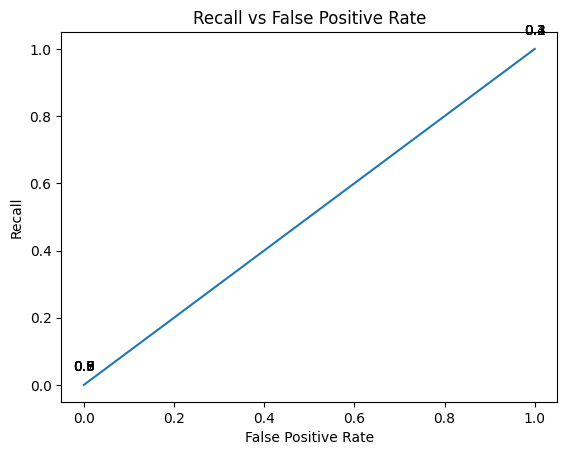

In [6]:
# use recall and FPR curve to determine best threshold for binarizing predictions
recalls = []
fprs = []
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # threshold above which a prediction probabiltiy is considered fire
for threshold in thresholds:
    recall = get_recall(val_fire_predictions, threshold)
    false_positive_rate = get_false_positive_rate(val_no_fire_predictions, threshold)
    recalls.append(recall)
    fprs.append(false_positive_rate)


# plot recall vs false positive rate
import matplotlib.pyplot as plt
plt.plot(fprs, recalls)

# add point lables with threshold
for i, txt in enumerate(thresholds):
    plt.annotate(txt, (fprs[i], recalls[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Recall vs False Positive Rate')
plt.show()

In [7]:
best_threshold = 0.5 # TODO:  manually choose the best threshold based on the plot


# get results on test videos
test_fire_predictions = get_predictions(my_image_model, test_fire_videos)
test_no_fire_predictions = get_predictions(my_image_model, test_no_fire_videos)
test_recall = get_recall(test_fire_predictions, best_threshold)
test_fpr = get_false_positive_rate(test_no_fire_predictions, best_threshold)
print("Test Recall: ", test_recall)
print("Test False Positive Rate: ", test_fpr)

Test Recall:  0.0
Test False Positive Rate:  0.0


In [8]:
# display video stream with fire or no fire text for firest video of each type in test set
# TODO: save these videos to files
import cv2
import numpy as np
for i,frame in enumerate(test_fire_videos[0]):

    frame = np.array(frame)
    # convert to BGR
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)


    cv2.putText(frame, "Fire" if test_fire_predictions[0][i] >= threshold else "No Fire", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Fire Video", frame)
    cv2.waitKey(30)
for i, frame in enumerate(test_no_fire_videos[0]):
    frame = np.array(frame)
    # convert to BGR
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    cv2.putText(frame, "Fire" if test_no_fire_predictions[0][i] >= threshold else "No Fire", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("No Fire Video", frame)
    cv2.waitKey(30)
cv2.destroyAllWindows()

/tmp/ipykernel_256067/324373332.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  frame = np.array(frame)


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 400
